<a href="https://colab.research.google.com/github/mbaishnavee05/Netflix_Movies_And_TV_Shows_Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Mounting the google drive and fetching Data_set and Importing required libraries and Modules**

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import plotly.express as px 
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import missingno as msno
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#fetching the given dataset
netflix_df=pd.read_csv('/content/drive/MyDrive/Almabetter Project - Unsupervised ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df=pd.DataFrame(netflix_df)

In [4]:
#First look
#Top 5 rows of the data set

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.


In [5]:
#last 5 rows of the dataset
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad","Sweden, Czech Republic, United Kingdom, Denmark, Netherlands","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies","When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals","A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & Musicals","In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV","Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize."
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.


In [6]:
#No of rows and columns of the dataset
netflix_df.shape

(7787, 12)

In [7]:
#info function will tell the count of null values and the data types of the column
netflix_df.info

<bound method DataFrame.info of      show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director  \
0                   NaN   
1     Jorge Michel Grau   
2          Gilbert Chan   
3           Shane Acker   
4        Robert Luketic   
...          

In [8]:
# Names Of columns in our dataset
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Null Values Operation**

In [9]:
#checking null values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Here we can see null values in director, cast, country, date_added and rating column.**

In [10]:
#droping all null values from director,cast,country,date_added and rating features 
netflix_df=df.dropna(subset=['director','cast','country','date_added','rating'],axis=0)


In [11]:
#cheacking null values  
netflix_df.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

## Adding new features on the data set

In [12]:
netflix_df = netflix_df[netflix_df['date_added'].notna()]
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [13]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Kids', 'Older Kids'],
      dtype=object)

In [14]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
age_rating      0
dtype: int64

# **Exploratory Data Analysis**

##1. No. Of TV Shows And Movies In Netflix

In [15]:
netflix_df['type'].value_counts()

Movie      4673
TV Show     135
Name: type, dtype: int64

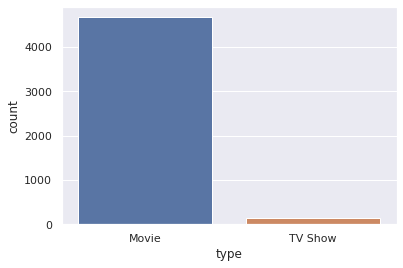

In [16]:
sns.countplot(netflix_df['type'])

**There are more number movies on Netflix than TV shows.**

**It is evident that there are more movies on Netflix than TV shows.**

**Netflix has 4673 movies, which is more than double the quantity of TV shows.**



## 2. Top three countries where Netflix is most popular?

In [17]:
top_three=netflix_df['country'].value_counts().head(3).reset_index()
top_three

,index,country
0,United States,1653
1,India,832
2,United Kingdom,174


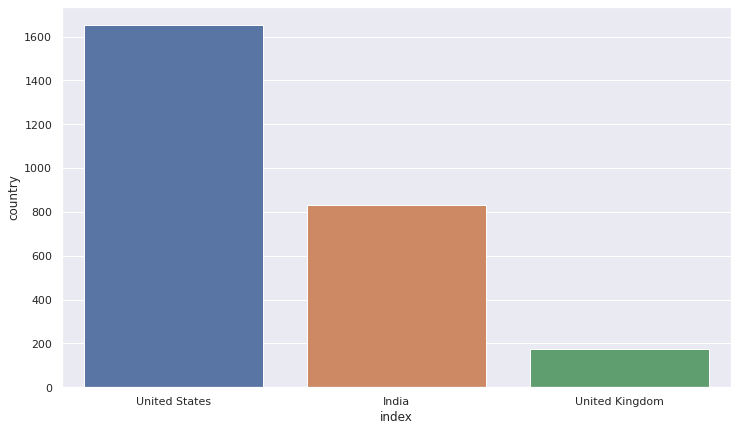

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(x=top_three['index'],y=top_three['country'])

## 3. Top 10 Genre in movies

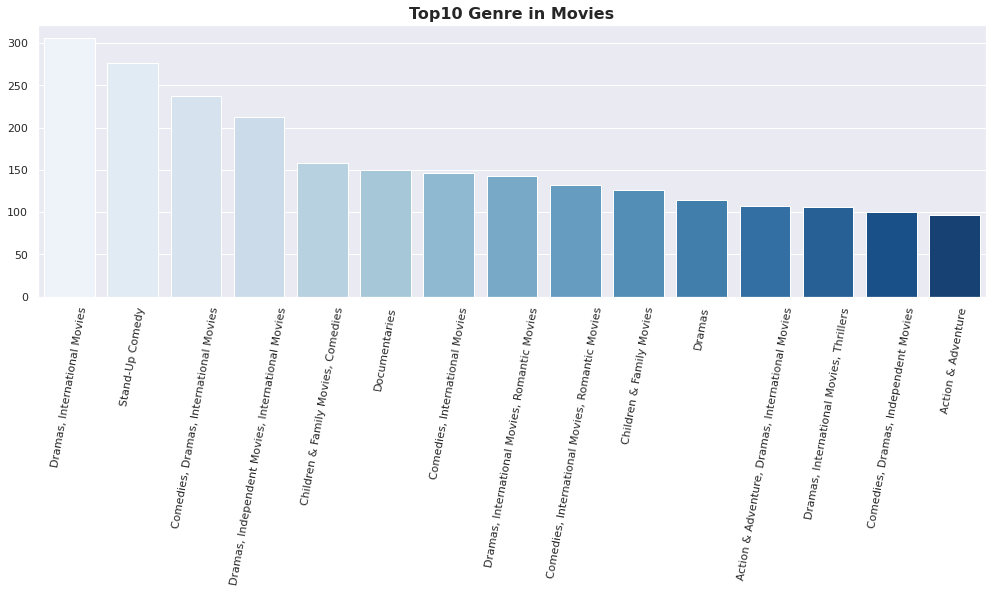

In [19]:
plt.figure(figsize=(17,5))
sns.barplot(x = netflix_df["listed_in"].value_counts().head(15).index,
            y = netflix_df["listed_in"].value_counts().head(15).values,palette="Blues")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

**From the above graph we came to know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies... and so on.**

##4. Total release for last 10 years

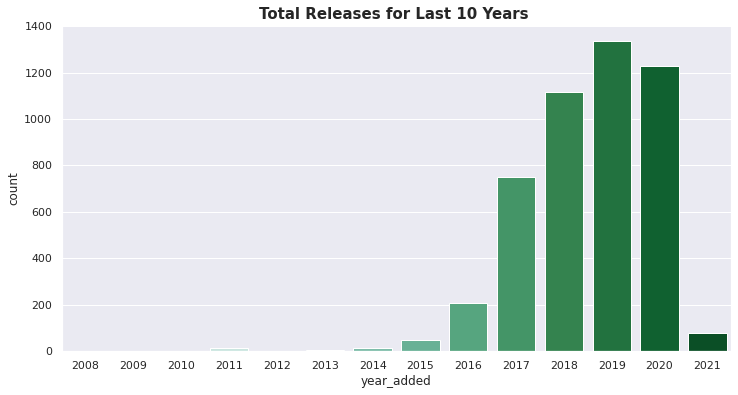

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='year_added',data=netflix_df,palette="BuGn")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

**The number of release have significantly increased after 2015 and have dropped in 2021 due to Covid 19**

## 5. Rating

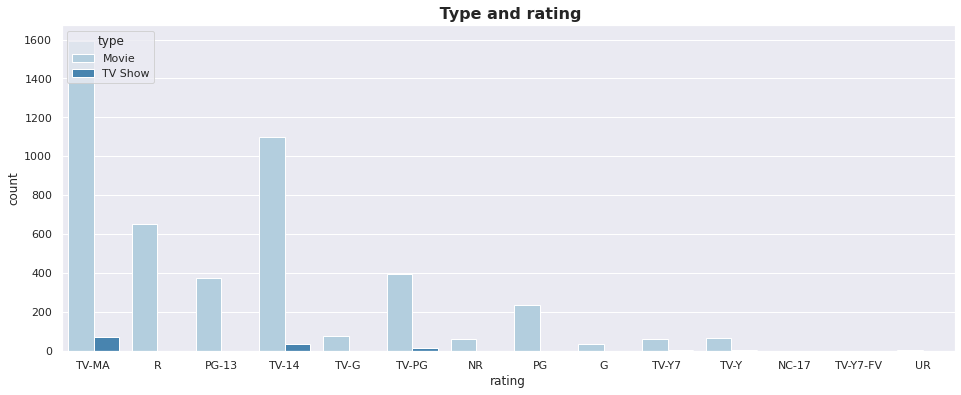

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(x='rating',hue='type',data=netflix_df,palette="Blues")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

**As shown in the plot above, TV-MA ratings are the highest in movies and TV shows, because TV-MA standing for Mature Audience Only. Because this programme is intended for adults, it may not be appropriate for children under the age of 17.**

## 6. Countries with the most content available

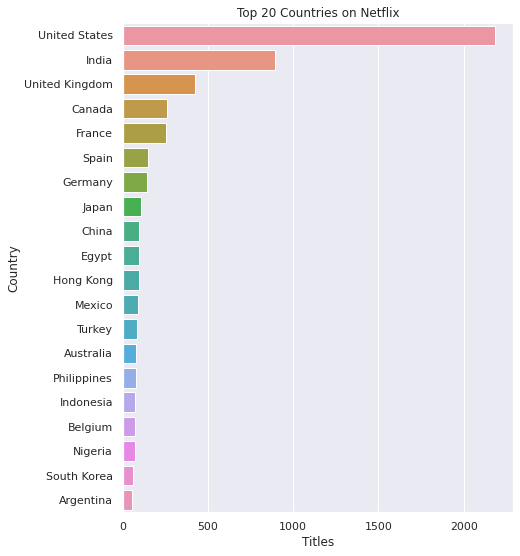

In [22]:
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

## 7. Netflix Content for different age groups.

In [23]:
netflix_df['country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['country'].head()

country_order = netflix_df['country'].value_counts()[:11].index
content_data = netflix_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [24]:
#corelation heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

netflix_df_heatmap = netflix_df.loc[netflix_df['country'].isin(data)]
netflix_df_heatmap = pd.crosstab(netflix_df_heatmap['country'], netflix_df_heatmap['age_rating'],normalize = "index").T
netflix_df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,Spain,Turkey,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.580645,0.263736,0.676692,0.255787,0.320988,0.824324,0.839286,0.530864,0.585209,0.526288
Kids,0.103226,0.000000,0.015038,0.004630,0.000000,0.013514,0.017857,0.012346,0.045016,0.056293
Older Kids,0.180645,0.043956,0.112782,0.156250,0.395062,0.013514,0.035714,0.098765,0.141479,0.176845
Teens,0.045161,0.000000,0.045113,0.004630,0.037037,0.027027,0.026786,0.000000,0.128617,0.147106
Young Adults,0.090323,0.692308,0.150376,0.578704,0.246914,0.121622,0.080357,0.358025,0.099678,0.093468


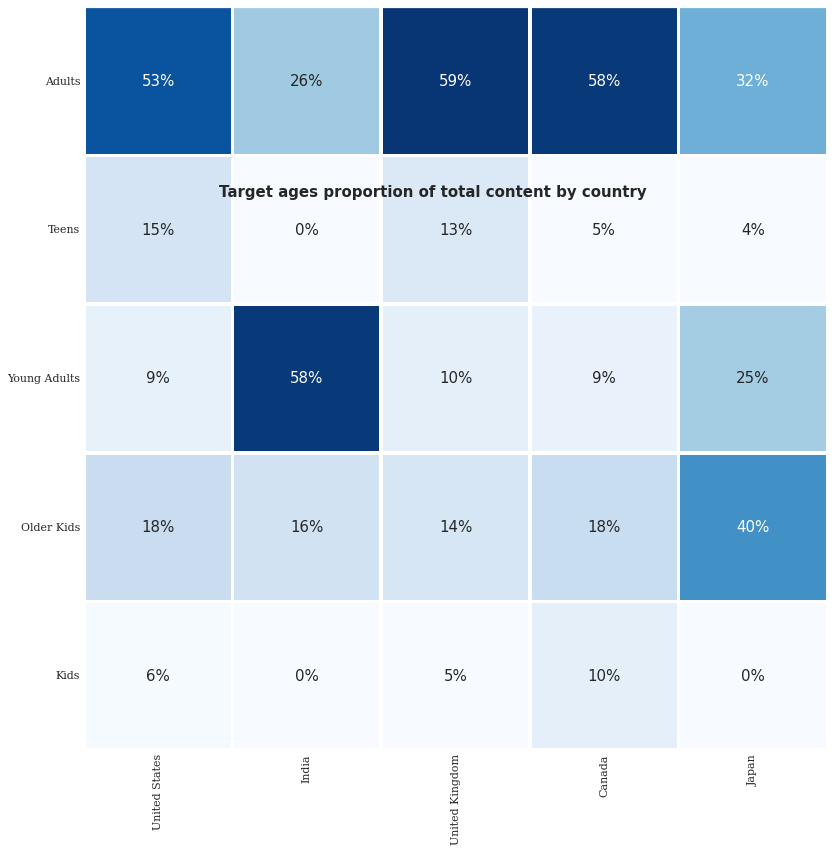

In [25]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(netflix_df_heatmap.loc[age_order,country_order2],cmap="Blues",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='ser', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

# **Asking and Answering Questions**

## Who are the top 10 directors on Netflix with the most releases?

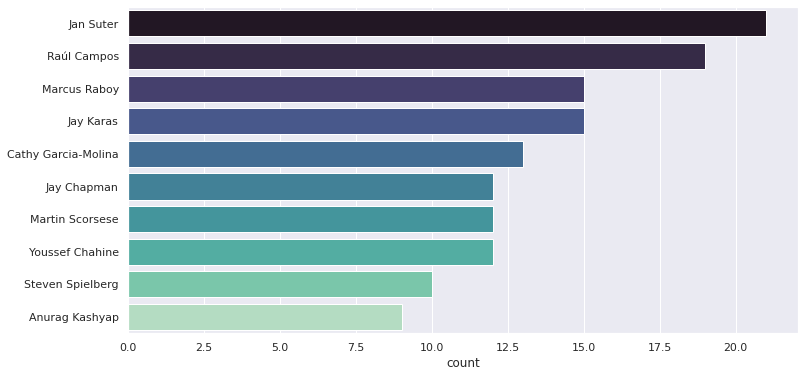

In [26]:
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

**As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.**

## Who are the top 10 actors on Netflix based on number of titles?

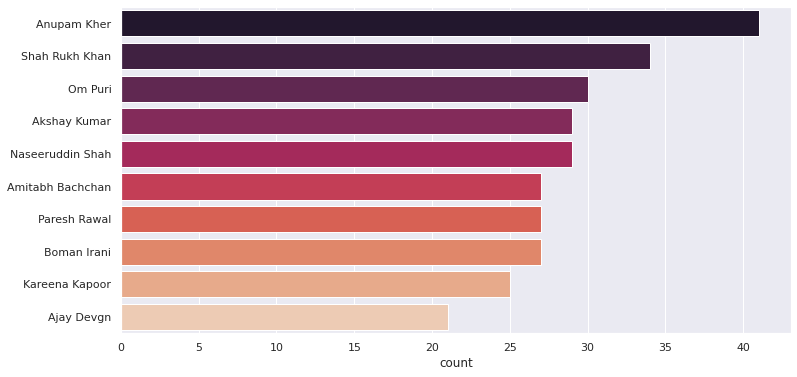

In [27]:
filtered_cast = netflix_df[netflix_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

**In this list, we can see that the most popular actors on Netflix based on the number of titles are all international as well. This reinforces the sentiment that the majority of Netflix subscribers are international.**

## How does the timeline look like for the addition of International Movies compared to International TV Shows?

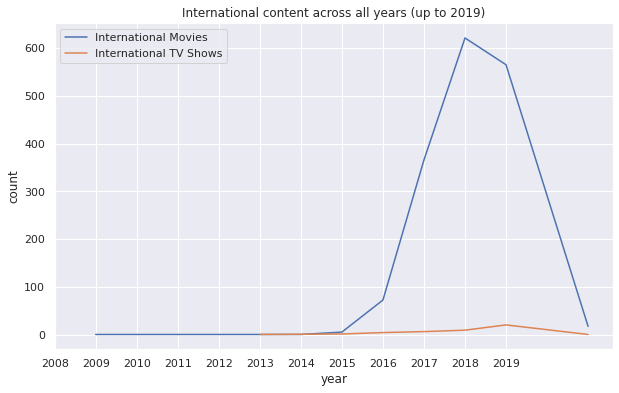

In [28]:
international_movies = netflix_df[netflix_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2020]

international_shows = netflix_df[netflix_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2020]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

**Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. However, from 2015 onwards the growth of international movies has been increased till 2018 then it started to decline while international tv shows constantly showed significant growth in the past few years.**

# **Data Preprocessing**

##  Modelling Approach:

1.Select the attributes based on which you want to cluster the shows

2.Text preprocessing: Remove all, stopwords and punctuation marks, convert all textual data to lowercase.

3.Lemmatization to generate a meaningful word out of corpus of words

4.Tokenization of corpus

5.Word vectorization

6.Dimensionality reduction

7.Used different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques


**We will cluster the shows on Netflix based on the following attributes:**

Director

Cast

Country

Listed in (genres)

Description




In [29]:
# Using the original dataset for clustering since
# it does not require handling missing values
netflix_tiles = netflix_df.copy()

In [30]:
netflix_tiles.fillna('',inplace=True)

In [31]:
# Combining all the clustering attributes into a single column

netflix_tiles['clustering_attributes'] = (netflix_tiles['director'] + ' ' + 
                                netflix_tiles['cast'] +' ' + 
                                netflix_tiles['country'] +' ' + 
                                netflix_tiles['listed_in'] +' ' + 
                                netflix_tiles['description'])

In [32]:
netflix_tiles['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

## Remove stopwords and lower case:

In [33]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [34]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [35]:
# Removing stop words
netflix_tiles['clustering_attributes'] = netflix_tiles['clustering_attributes'].apply(stopwords)
netflix_tiles['clustering_attributes'][40]

'muharrem gülmez erdem yener, ayhan taş, emin olcay, muharrem gülmez, elif nur kerkük, tarık papuççuoğlu, suzan aksoy, doğa konakoğlu, esin eden, deniz özerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

##  Remove punctuations:

In [36]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [37]:
# Removing punctuation marks
netflix_tiles['clustering_attributes'] = netflix_tiles['clustering_attributes'].apply(remove_punctuation)
netflix_tiles['clustering_attributes'][40]

'muharrem gülmez erdem yener ayhan taş emin olcay muharrem gülmez elif nur kerkük tarık papuççuoğlu suzan aksoy doğa konakoğlu esin eden deniz özerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

## Lemmatization:

In [38]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [39]:
# Lemmatization
netflix_tiles['clustering_attributes'] = lemmatize_verbs(netflix_tiles['clustering_attributes'])
netflix_tiles['clustering_attributes'][40]

'muharrem gülmez erdem yener ayhan taş emin olcay muharrem gülmez elif nur kerkük tarık papuççuoğlu suzan aksoy doğa konakoğlu esin eden deniz özerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

## Tokenization:

In [40]:
tokenizer = TweetTokenizer()
netflix_tiles['clustering_attributes'] = netflix_tiles['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

## Vectorization:

In [41]:
# clustering tokens saved in a variable
clustering_data = netflix_tiles['clustering_attributes']
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)
X

<4808x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 156290 stored elements in Compressed Sparse Row format>

In [42]:
# Shape of X
X.shape

(4808, 20000)

In [43]:
# data type of vector
type(X)

scipy.sparse.csr.csr_matrix

In [44]:
# convert X into array form for clustering
X = X.toarray()

## Dimensionality reduction using PCA:

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

1.I found that 100% of the variance is explained by about ~4500 components.

2.Also, more than 80% of the variance is explained just by 3000 components.

3.Hence to simplify the model, and reduce dimensionality, I can take the top 3000 components, which will still be able to capture more than 80% of variance. 

In [ ]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000,random_state=42)
pca.fit(X)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

# **Clusters implementation:**

## **1. K-Means Clustering**

Building clusters using the K-means clustering algorithm.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.**

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,20)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

**The highest Silhouette score is obtained for 8 clusters.**

## Building 8 clusters using the k-means clustering algorithm:

In [ ]:
# Clustering the data
kmeans = KMeans(n_clusters=8,init='k-means++',random_state=33)
kmeans.fit(x_pca)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)


In [ ]:
print((kmeans_distortion,kmeans_silhouette_score))

In [ ]:
# Adding a kmeans cluster number attribute
netflix_tiles['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(12,7))
q = sns.countplot(x='kmeans_cluster',data=netflix_tiles, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


## **2. Hierarchical clustering**

Building clusters using the agglomerative (hierarchical) clustering algorithm.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm.



In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

**At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.**

## Building 12 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
netflix_tiles['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=netflix_tiles, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# **Conclusions:**

1.The dataset contained about 7787 rows, and 12 columns.

2.I began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

3.There are more number movies on Netflix than TV shows.
It is evident that there are more movies on Netflix than TV shows.
Netflix has 4673 movies, which is more than double the quantity of TV shows.

4.The number of release have significantly increased after 2015 and have dropped in 2021 due to Covid 19.

5.TV-MA ratings are the highest in movies and TV shows, because TV-MA standing for Mature Audience Only. Because this programme is intended for adults, it may not be appropriate for children under the age of 17.

6.I used Principal Component Analysis (PCA) to handle the curse of dimensionality. 3000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 3000.

7.I first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 8. This was obtained through the elbow method and Silhouette score analysis.

8.Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.